# Status prediction in the American Bankruptcy dataset.

## Import Usefull Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)
import math
import csv
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context(font_scale=2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
import warnings
import scipy
# Ignore all warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_selection import SelectKBest, f_classif
#StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

#ensemble
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#Principal Component Analysis
from sklearn.decomposition import PCA

from scipy.stats import f_oneway

## Data Preparation 
- (Load the data,Data cleaning and preprocessing)

## Load the data: 
- The dataset is available in CSV format, so we can load it using a data manipulation library like pandas.

In [2]:
import pandas as pd
import numpy as np

# Load the dataset from the GitHub repository 
#  data = pd.read_csv('https://github.com/sowide/bankruptcy_dataset/blob/main/american_bankruptcy_dataset.csv')

data = pd.read_csv('/content/sample_data/american_bankruptcy_dataset.csv')

data.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999.0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000.0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001.0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002.0,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003.0,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


- Problem statement:
Create a Predictive model which can tell weather a company is alive or not?
-- Target Variable: status_label
-- Predictors: X1,X2,X3, etc.

- Determining the type of Machine Learning:
Based on this problem statement we need to create a supervised ML classification model, as the target variable is categorical.

<Axes: xlabel='status_label'>

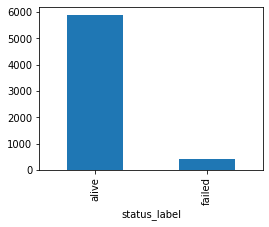

In [3]:
# Distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('status_label').size()
GroupedData.plot(kind='bar', figsize=(4,3))

There are quite sufficient number of rows for each category to learn from.

## Data cleaning and preprocessing: 

This step involves removing any missing or erroneous data, , dropping irrelevant columns, handling categorical variables (e.g., one-hot encoding or label encoding, or converting categorical variables into numerical variables), scaling numerical features (if needed), and splitting the data into training and testing sets.


### Data Exploration
--> Check if all features are numeric. We have to check this becuase some algorithms can only handle the numeric data. 

In [4]:
print("Shape of data: ", data.shape)
display(data.info())

Shape of data:  (6290, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  6290 non-null   object 
 1   status_label  6290 non-null   object 
 2   year          6290 non-null   float64
 3   X1            6290 non-null   float64
 4   X2            6290 non-null   float64
 5   X3            6290 non-null   float64
 6   X4            6290 non-null   float64
 7   X5            6290 non-null   float64
 8   X6            6290 non-null   float64
 9   X7            6290 non-null   float64
 10  X8            6290 non-null   float64
 11  X9            6290 non-null   float64
 12  X10           6290 non-null   float64
 13  X11           6290 non-null   float64
 14  X12           6289 non-null   float64
 15  X13           6289 non-null   float64
 16  X14           6289 non-null   float64
 17  X15           6289 non-null   float64
 18  X

None

In [5]:
data.describe(include='all')

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,6290,6290,6290.000000,6290.00000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6.290000e+03,6290.000000,6290.000000,6290.000000,6289.000000,6289.000000,6289.00000,6289.000000,6289.000000,6289.000000,6289.000000
unique,516,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C_259,alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,5895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.788076,2080.14120,3536.803080,319.631010,1002.896339,498.955552,384.472663,706.454561,7.810865e+03,5330.743260,7393.114362,1821.207897,683.372802,1794.212347,1587.18360,1834.358423,5331.573087,4757.584366,4328.518650
std,NaN,NaN,5.592889,6269.45095,11794.485495,1287.160209,3927.227594,2018.991217,2170.923830,2124.333249,3.144973e+04,16465.751197,23395.318770,6142.261311,2934.039210,5887.982326,5109.95688,8586.344518,16466.928907,15049.858870,13226.671275
min,NaN,NaN,1999.000000,0.00100,0.000000,0.000000,-21913.000000,0.000000,-23119.000000,0.000000,1.900000e-03,0.001000,0.002000,0.000000,-25913.000000,-21536.000000,0.00700,-78525.000000,0.001000,0.007000,0.009000
25%,NaN,NaN,2002.000000,45.01350,63.847000,3.326500,7.170500,6.124750,0.271500,11.765750,6.311852e+01,98.598750,87.623750,1.731250,3.058000,27.208000,18.99700,3.538000,98.592000,35.739000,87.795000
50%,NaN,NaN,2006.000000,275.95900,468.108500,28.536500,82.528000,43.792500,18.599000,88.026500,6.387940e+02,776.202500,725.309000,102.111500,47.888000,215.000000,149.80800,133.130000,778.205000,352.151000,660.234000
75%,NaN,NaN,2011.000000,1454.45975,2402.221750,159.313500,541.825000,341.260500,183.731250,482.959500,3.850635e+03,3773.972000,4297.107500,1047.320250,368.183000,1268.000000,939.28000,1075.200000,3774.296000,2804.660000,3039.400000


In [6]:
# Drop irrelevant columns
data.drop(['company_name', 'year'], axis=1, inplace=True)

# Convert categorical variables to numerical variables
data['status_label'] = data['status_label'].apply(lambda x: 1 if x == 'alive' else 0)

### Visual Exploratory Data Analysis
- Categorical variables: Bar plot
- Continuous variables: Histogram

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>],
       [<Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>],
       [<Axes: title={'center': 'X9'}>, <Axes: title={'center': 'X10'}>,
        <Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>],
       [<Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>, <Axes: title={'center': 'X16'}>],
       [<Axes: title={'center': 'X17'}>, <Axes: title={'center': 'X18'}>,
        <Axes: >, <Axes: >]], dtype=object)

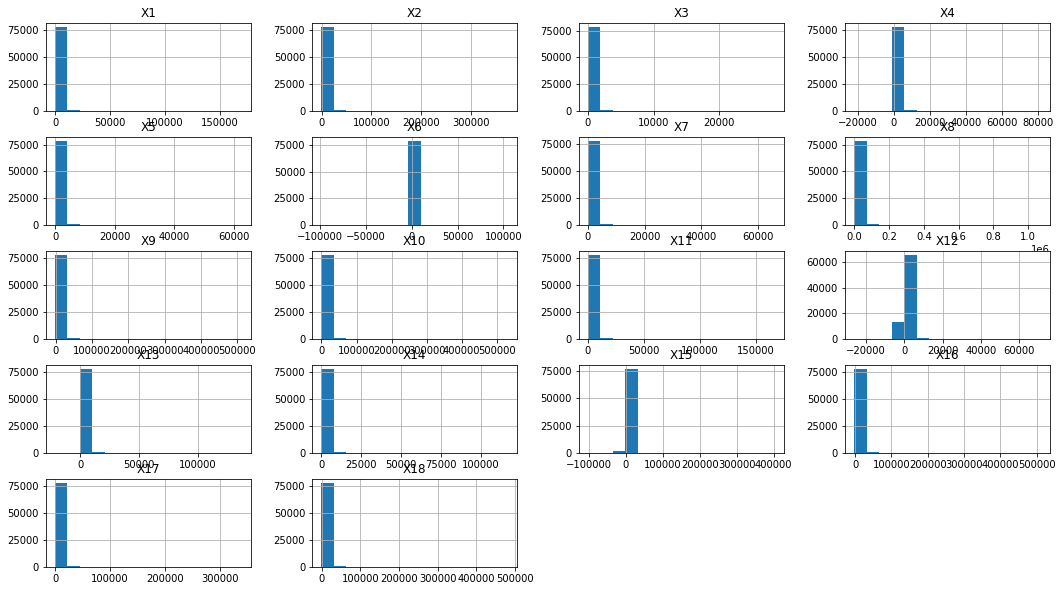

In [38]:
# Plotting histograms of multiple columns together
data.hist(['X{}'.format(i) for i in range(1,19)], figsize=(18,10),bins=15)

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers, these kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

### Anomalies & Outliers treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Extreme outliers are data points that are significantly different from the rest of the data in a dataset. They can have a significant impact on the statistical properties of the data and can affect the performance of machine learning models. The extreme outliers is the points where 

    - x < Q1 - 3 * IQR       
    - x > Q3 + 3 * IQR
   
where IQR = third_quartile - first_quartile

In [31]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [32]:
# loop through all columns to see if there are any outliers
for column in data.columns:
    if outlier_function(data, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data, column)[2], column))

There are 5220 outliers in status_label
There are 7603 outliers in X1
There are 8262 outliers in X2
There are 8267 outliers in X3
There are 8784 outliers in X4
There are 9215 outliers in X5
There are 11876 outliers in X6
There are 7831 outliers in X7
There are 8261 outliers in X8
There are 7998 outliers in X9
There are 8412 outliers in X10
There are 9592 outliers in X11
There are 9434 outliers in X12
There are 7881 outliers in X13
There are 8738 outliers in X14
There are 12455 outliers in X15
There are 7998 outliers in X16
There are 9273 outliers in X17
There are 7968 outliers in X18


* Comments: There are many rows with our contraints of anormality, i don't think, it is worth to delete all them (we will be reducing the size of the dataset which can't be good for ML). Therefore, we can do further preprocesing.

### Missing values treatment
-> Check if there is no missing value in dataset because some machine learning algorithms cannot handle missing values and will produce an error or produce incorrect results if the data contains missing values.

Options for treating missing values in data.
- Delete the rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values, business logic etc.

In [11]:
data.isnull().sum()

status_label    0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             1
X13             1
X14             1
X15             1
X16             1
X17             1
X18             1
dtype: int64

In [12]:
# Replace missing values with the median of the respective column
data.fillna(data.median(), inplace=True)

In [13]:
data.isnull().sum().sum()

0

In [19]:
display(data.describe())

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,4.991300e+04,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000
mean,0.934045,1147.536006,2148.749850,161.342461,513.973790,271.066103,185.807302,380.214707,4.413561e+03,3178.121473,3834.043853,937.841715,352.631122,1029.370517,821.431682,839.978485,3178.121478,2381.736525,2664.148085
std,0.248205,4645.798315,10885.198054,798.609622,2450.930463,1290.029789,1538.832375,1617.312766,2.094088e+04,14561.274499,15721.250411,3891.457757,1815.031936,4555.988135,3574.032809,7850.736104,14561.274498,9826.583609,12688.680033
min,0.000000,-0.013000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,1.000000,20.726000,22.289000,1.400000,0.373000,0.537000,-3.921000,4.199000,3.582520e+01,35.569000,41.369000,0.033000,-0.965000,11.377000,9.883000,-38.820000,35.569000,15.877000,38.073000
50%,1.000000,126.173000,160.158000,10.608000,24.244000,14.225000,3.797000,32.053000,2.619500e+02,269.699000,276.924000,15.922000,12.101000,85.153500,55.716000,12.790000,269.703000,114.760500,235.831000
75%,1.000000,581.900000,916.210000,65.379000,200.418000,121.515000,62.031000,186.900000,1.637741e+03,1517.307000,1650.557000,349.347000,130.176000,475.793000,316.605000,295.400000,1517.307000,890.196000,1266.055000
max,1.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


## Feature Engineering: 

We can extract new features from the existing variables or transform existing features to improve the predictive power of the model. 

In [ ]:
# Create new features
# We need to know the signification of each feature X1,X2, etc.

## Feature selection: 
In this step, we can identify the most important columns(features) that are relevant/correlated to the target variable (status_label). We can use techniques like correlation analysis or feature importance analysis to identify the most important features.

Two ways for that: 
- Visual exploration of relationship between variables: 
it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data
 - Continuous Vs Continuous ---- Scatter Plot
 - Categorical Vs Continuous---- Box Plot
 - Categorical Vs Categorical---- Grouped Bar Plots
- Statistical measurement of relationship strength between variables (correlation values or ANOVA/Chi-Square tests.)
 - Continuous Vs Continuous ---- Correlation matrix
 - Categorical Vs Continuous---- ANOVA test
 - Categorical Vs Categorical--- Chi-Square test


Since our Target variable is categorical and predictors are continuous, we present the scenario:
- Categorical Target Variable Vs Continuous Predictor

### Data Analysis
#### Relationship exploration: Categorical Vs Continuous -- Box Plots

In [68]:
#data_set = data.copy()

### Sandardization of data ###
# Choose either standardization or Normalization

# Choose between standardization and MinMAx normalization
#PredictorScaler1=StandardScaler()

# Storing the fit object for later reference
#PredictorScalerFit1=PredictorScaler1.fit(data_set[['X{}'.format(i) for i in range(1,19)]])

# Generating the standardized values of X
#data_set_scaled=PredictorScalerFit1.transform(data_set[['X{}'.format(i) for i in range(1,19)]])
#data_set_scaled=pd.DataFrame(data=data_set_scaled,columns=data.iloc[:,1:].columns)
#data_set_scaled['status_label'] = data['status_label']

# Box plots for Categorical Target Variable "status_label" and continuous predictors
#ContinuousColsList= ['X{}'.format(i) for i in range(1,10)] 


#fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"#
#for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
#    data_set_scaled.boxplot(column=PredictorCol, by='status_label', figsize=(5,5), vert=True, ax=PlotCanvas[i])

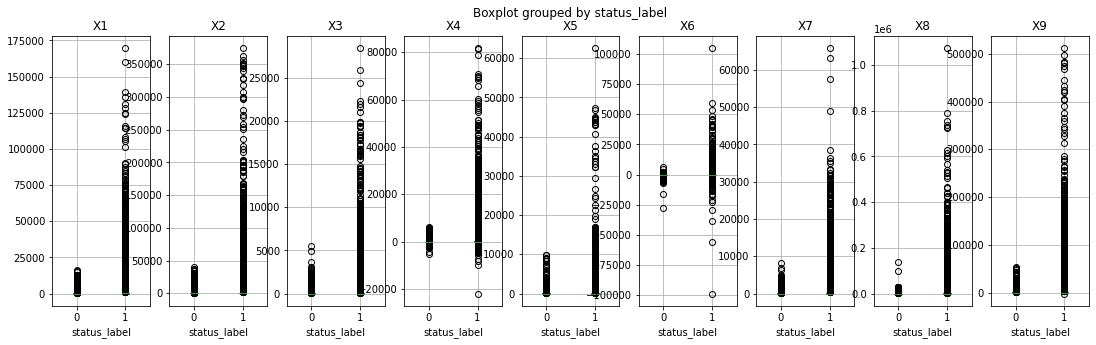

In [41]:
# Box plots for Categorical Target Variable "status_label" and continuous predictors
ContinuousColsList= ['X{}'.format(i) for i in range(1,10)] 


fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='status_label', figsize=(5,5), vert=True, ax=PlotCanvas[i])

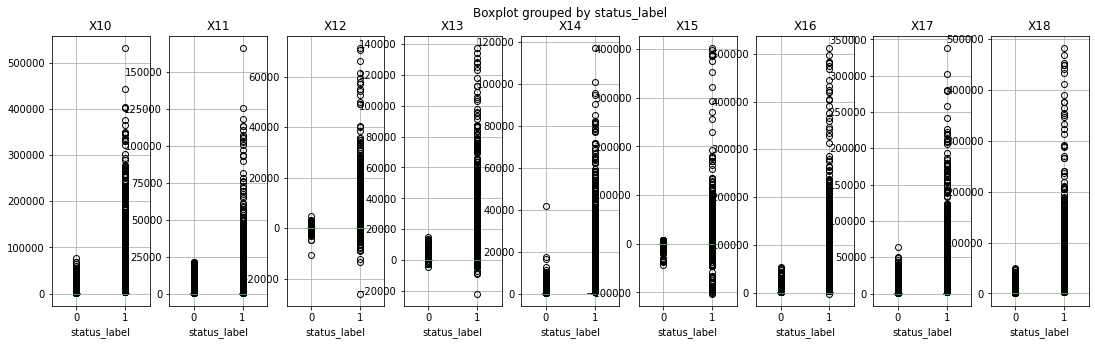

In [44]:
# Box plots for Categorical Target Variable "status_label" and continuous predictors
ContinuousColsList= ['X{}'.format(i) for i in range(10,19)] 

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='status_label', figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution does not look similar for each category(Boxes aren't in the same line), that means the the continuous variable has an effect on the target variable. Hence, the variables are correlated to each other.

The charts also exhibit that characteristics, hence all the features are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
- Assumption(H0): There is NO relation between the given variables (i.e. the average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
- ANOVA Test result: Probability of H0 being true

In [59]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('----- ANOVA Results ----- \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    print('\n ----- The selected features are: ----- \n')
    return(SelectedPredictors)

In [60]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['X{}'.format(i) for i in range(1,19)] 
FunctionAnova(inpData=data, TargetVariable='status_label', ContinuousPredictorList=ContinuousVariables)

----- ANOVA Results ----- 

X1 is correlated with status_label | P-Value: 5.3027815285854314e-20
X2 is correlated with status_label | P-Value: 6.356264872197013e-10
X3 is correlated with status_label | P-Value: 5.0735981070169176e-05
X4 is correlated with status_label | P-Value: 8.446543314287063e-19
X5 is correlated with status_label | P-Value: 5.208748443785706e-12
X6 is correlated with status_label | P-Value: 9.538596173565117e-26
X7 is correlated with status_label | P-Value: 5.819039480048008e-18
X8 is correlated with status_label | P-Value: 2.9148046196309245e-25
X9 is correlated with status_label | P-Value: 1.5251569364207886e-13
X10 is correlated with status_label | P-Value: 3.3721329998838767e-12
X11 is correlated with status_label | P-Value: 0.009125185497232013
X12 is correlated with status_label | P-Value: 3.294709628825785e-24
X13 is correlated with status_label | P-Value: 2.03983307948854e-18
X14 is correlated with status_label | P-Value: 2.242855682872181e-11
X15 is corre

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18']

#### **Correlation matrix of continuous features**

<Axes: >

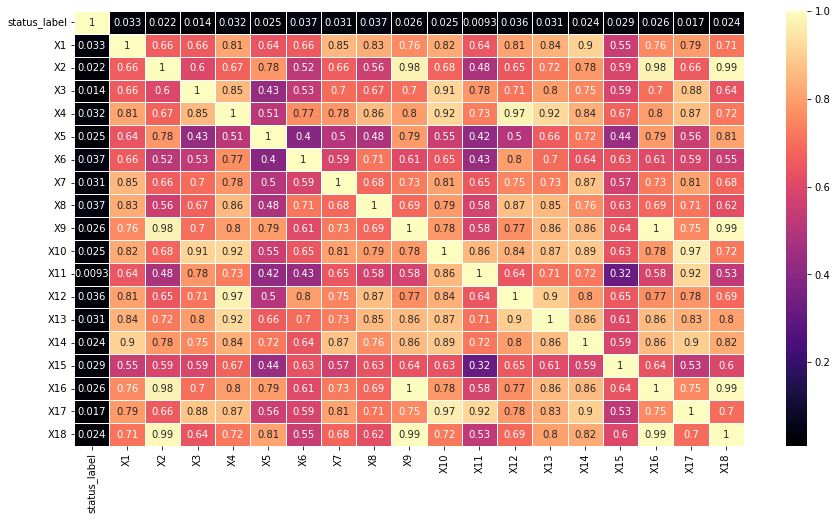

In [52]:
#Continuous features 
continuous_features=data.loc[:,'X1':'X18']
plt.figure(figsize=(15,8))
sns.heatmap(data[['status_label'] + continuous_features.columns.values.tolist()].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

we see that, X1 and X14 are highly correlated(0.9), X2,X9,X16 and X18  too (0.99), X3, X10,X11 and X17, X4, X12 and X13

In [68]:
# Separate the features and target variable
X = data.drop(['status_label'], axis=1)
y = data['status_label']

#### Selecting final predictors for Machine Learning

In [58]:
# Feature Selection using ANOVA 
# Alternative we can use chi2 but chi2 doesn't allow us to pass the non-negative value.

#select 9 most important features
selector = SelectKBest(f_classif, k=9)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
feature_names = [X.columns.values[i] for i in selector.get_support(indices=True)]
print(f"Selected features: {feature_names}")

Selected features: ['X1', 'X4', 'X6', 'X7', 'X8', 'X12', 'X13', 'X15', 'X16']


In [70]:
# Separate Target Variable and Predictor Variables
TargetVariable='status_label'
Predictors=['X1', 'X4', 'X6', 'X7', 'X8', 'X12', 'X13', 'X15', 'X16']
X=X[Predictors]

#### Standardization/Normalization of data

Necessary, if we are to use KNN or Neural Networks, sum up distance based Models.

* Some models of machine learning will produce the correct result only in case of the data is centered and has unit variance. 

In [71]:
### Sandardization of data ###
# Choose either standardization or Normalization

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

#### Machine Learning: Splitting the data into Training and Testing sample

In [85]:
# Split the data into training and testing set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (62945, 9)
Validation Data Shape: (15737, 9)



## Model selection: 
After identifying the relevant features, we can select an appropriate machine learning model based on the nature of the problem, the size of the dataset, and the available computational resources to train on the dataset. Depending on the size of the dataset and the complexity of the problem, we can choose from a range of models like logistic regression, random forest, XGBoost, which are commonly used for binary classification problems or neural networks.

   1)  Logistic Regression 
   
   2) Decision Tree Classifier
   
   3) Random Forest Classifier
    
   4) Extra Trees (Random Forests) Classifier
   
   5) Support Vector Machine Classifier
   
   6) Extreme Gradient Boosting (XGBoost) Classifier
   
   7) Naive Bayes Classifier

   8) K-Nearest Neighbors Classifier
   
   9) Neural Network Classifier 
   
   and compare the results on accuracy score. Then I will select the best model with the highest accuracy score for use.

In [75]:
#Compare all classifier 
# --------------------
#Fit models
# Logistic Regression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
lr_clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
lr_clf.fit(X_train,y_train)
#knn
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
#decision tree
decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train,y_train)
#random forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
#XGB
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
#Tree
xrf_clf = ExtraTreesClassifier()
xrf_clf.fit(X_train,y_train)
#SVM 
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
#naive bayes
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train,y_train)
#NN
nn_clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
nn_clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

### Compare model with the validation data set 

For validating the models, we can use various techniques such as holdout validation, k-fold cross-validation, or stratified sampling. We can also use techniques such as feature importance analysis, partial dependence plots, or SHAP values to understand the model's behavior and improve its interpretability. Additionally, we can use techniques such as A/B testing or online evaluation to validate the model's performance in real-world scenarios.
Here we use cross-validation

In [82]:
# Performance of each model, here we use the accuracy
models= [('LogisticRegression', lr_clf),('knn_classifier', knn_classifier),('decision tree', decision_clf), ('random forest', forest_clf), ('XGB', xgb_clf),('ExtraTree', xrf_clf),
        ('SVM', svm_clf),('Naive Bayes', gaussian_clf),('Neural Network', nn_clf)]
for i, model in models:    
    predictions = model.predict(X_valid)
    accuracy = metrics.accuracy_score(y_valid, predictions)
    print('Accuracy  of ', i , 'is: ',accuracy)
    print('Cross Validation Score of ', i , 'is : ' ,cross_val_score(model, X_valid, y_valid, cv=5).mean())

Accuracy  of  LogisticRegression is:  0.9320073711635001
Cross Validation Score of  LogisticRegression is :  0.9318167319352572
Accuracy  of  knn_classifier is:  0.9337230730126453
Cross Validation Score of  knn_classifier is :  0.9285123404674549
Accuracy  of  decision tree is:  0.8894325474995234
Cross Validation Score of  decision tree is :  0.8782484397516199
Accuracy  of  random forest is:  0.9346126961936837
Cross Validation Score of  random forest is :  0.9319436957970904
Accuracy  of  XGB is:  0.9330876278833323
Cross Validation Score of  XGB is :  0.9297194964729119
Accuracy  of  ExtraTree is:  0.9360742199911037
Cross Validation Score of  ExtraTree is :  0.9332781992410029
Accuracy  of  SVM is:  0.9321344601893626
Cross Validation Score of  SVM is :  0.9321344746958541
Accuracy  of  Naive Bayes is:  0.14812225964287984
Cross Validation Score of  Naive Bayes is :  0.1593702923540259
Accuracy  of  Neural Network is:  0.9331511723962636
Cross Validation Score of  Neural Network 

##### Result

   We see that ExtraTree still give the best performance with the data. It has an accuracy of 0.936 with CV Score : 0.933(5-Fold). 





## Model Selection and training: 
We can train the selected model on the training data using an appropriate training algorithm. We can also use techniques like cross-validation to evaluate the model's performance and tune the hyperparameters.

### Model Choice 
   We will choose ExtraTreeClassifier as our final model.

* Some machine learning model doesn't care about the scale of the data such as the model which build with tree.

In [87]:
# Separate the features and target variable
X = data.drop(['status_label'], axis=1)
y = data['status_label']

Predictors=['X1', 'X4', 'X6', 'X7', 'X8', 'X12', 'X13', 'X15', 'X16']
X=X[Predictors]

# Split the data into training and testing set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
#Tree
xrf_clf = ExtraTreesClassifier()
xrf_clf.fit(X_train,y_train)

predictions = model.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, predictions)
print('Accuracy  of ExtraTreeClassifier is: ',accuracy)
print('Cross Validation Score of ExtraTreeClassifier is : ' ,cross_val_score(model, X_valid, y_valid, cv=5).mean())

Accuracy  of ExtraTreeClassifier is:  0.9246997521763995
Cross Validation Score of ExtraTreeClassifier is :  0.9069697689132548


We can see the features importants which train this model

In [90]:
#create list of features
features = list(X_train.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': xrf_clf.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results

,feature,importance
0,X15,0.116411
1,X4,0.114692
2,X16,0.113079
3,X13,0.112897
4,X8,0.111641
5,X7,0.109679
6,X1,0.109425
7,X12,0.108125
8,X6,0.104051


### Perform Hyperparameter Tuning on the Best Model

   The model with default parameters gives us a good performance on training set, but it might be too complex or produce overfitting on the overall dataset, so doing hyperparameter tunning can avoid or reduce overfitting of our model.
    
   There are two way of doing hyperparameter tuning, there is RandomizedSearchCV and GridSearchCV.
   
   We can used GridSearchCV when the Model has a good performance in term of execution time, so I will train all combination of paramters.

In [91]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500]

max_depth = [None, 10, 20, 30, 40, 50]


# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split
                       }

In [92]:
# create model
best_model = ExtraTreesClassifier()

# Create the randomized search CV object
random_search = RandomizedSearchCV(best_model, param_distributions = hyperparameter_grid, n_iter=100, cv = 5, scoring = 'accuracy', verbose = 1,
                               n_jobs = -1, return_train_score = True)

In [93]:
best_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [94]:
# Fit on the all training data using random search object
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [95]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [96]:
random_search.best_estimator_.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=50)

In [100]:
y_pred = random_search.best_estimator_.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, y_pred)
print('Accuracy of tunning model is', accuracy)
print('Cross Validation Score of tuning model is : ' ,cross_val_score(random_search.best_estimator_, X_valid, y_valid, cv=5).mean())

Accuracy of tunning model is 0.9365825760945542
Cross Validation Score of tuning model is :  0.9334052640440523


*Before tunning*
    
   - Accuracy: 0.9246
   
   - CV Score: 0.9069
* General Remark: the standardization rather seems to increase the accuracy (surely because, with standard values, errors in calculus when running algorithms decrease)  

*After tunning*

   - Accuracy:  0.9365
   
   - CV Score: 0.9334
 


We see that the accuracy of the model increase.
   
    


## Model evaluation: 
## Cross Validation and Metrics
After training the model, we can evaluate its performance on the testing data. We can use various metrics like accuracy, precision, recall, F1 score, confusion matrix  or ROC curve to evaluate the model's performance.

              precision    recall  f1-score   support

           0       0.96      0.07      0.13      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.94     15737
   macro avg       0.95      0.53      0.55     15737
weighted avg       0.94      0.94      0.91     15737

[[   73   995]
 [    3 14666]]
Accuracy of the model on validation Sample Data: 0.91

Accuracy values for 5-fold Cross Validation:
 [0.90354926 0.90184676 0.9010764  0.90148007 0.90254031]

Final Average Accuracy of the model: 0.9


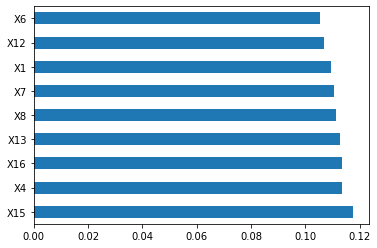

In [119]:
# Measuring accuracy on Testing Data

print(metrics.classification_report(y_valid, y_pred))
print(metrics.confusion_matrix(y_valid, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_valid, y_pred, average='weighted')
print('Accuracy of the model on validation Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 9 most important columns
%matplotlib inline
feature_importances = pd.Series(random_search.best_estimator_.feature_importances_, index=Predictors)
feature_importances.nlargest(9).plot(kind='barh')


# Running 5-Fold Cross validation on a given algorithm (ExtraTreesClassifier)
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(random_search.best_estimator_, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Deployment of the Model

## other approach: Performance Improvement

### 1. Without reducting the numbers of features

In [59]:
data_set=data.copy()
# Separate the features and target variable
X = data.drop(['status_label'], axis=1)
y = data['status_label']

### Sandardization of data ###
# Choose either standardization or Normalization

# Choose between standardization and MinMAx normalization
PredictorScaler2=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit2=PredictorScaler2.fit(X)

# Generating the standardized values of X
X2=PredictorScalerFit2.transform(X)

# Split the data into training and testing set
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [60]:

models={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Extra Tree' : ExtraTreesClassifier(),
    'Support Vector Machine(Linear Kernel)': LinearSVC(),
    'Support Vector Machine(Non Linear Kernel)':SVC(),
    'Neural Network':MLPClassifier(),
     'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier()
}

In [21]:
original_results=[]
for name,model in models.items():
    model.fit(X_train2,y_train2)
    score=model.score(X_valid2,y_valid2)
    original_results.append(score)
    print(name+":"+str(score))

Logistic Regression:0.9324324324324325
K-Nearest Neighbors:0.9634340222575517
Decision Tree:0.93879173290938
Extra Tree:0.9713831478537361
Support Vector Machine(Linear Kernel):0.9324324324324325
Support Vector Machine(Non Linear Kernel):0.9324324324324325
Neural Network:0.9364069952305246
Random Forest:0.9578696343402225
Gradient Boosting:0.9419713831478538


* Comments: With Extra Tree, we reach an accuracy of 0.97

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        87
           1       0.97      1.00      0.98      1171

    accuracy                           0.97      1258
   macro avg       0.98      0.79      0.86      1258
weighted avg       0.97      0.97      0.97      1258

[[  50   37]
 [   0 1171]]
Accuracy of the model on validation Sample Data: 0.97

Accuracy values for 10-fold Cross Validation:
 [0.93547037 0.93822074 0.92901254 0.91365602 0.91183271 0.91040869
 0.9222904  0.914779   0.91040869 0.90246803]

Final Average Accuracy of the model: 0.92


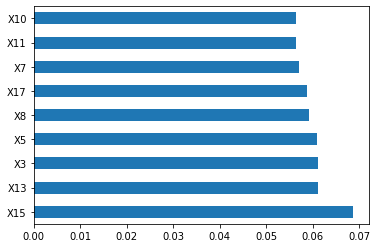

In [67]:
# Measuring accuracy on Testing Data

xrf_clf2=models['Extra Tree']
y_predict = xrf_clf2.predict(X_valid2)
print(metrics.classification_report(y_valid2, y_predict))
print(metrics.confusion_matrix(y_valid2, y_predict))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_valid2, y_predict, average='weighted')
print('Accuracy of the model on validation Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 9 most important columns
%matplotlib inline
feature_importances = pd.Series(xrf_clf2.feature_importances_, index=X.columns)
feature_importances.nlargest(9).plot(kind='barh')


# Running 10-Fold Cross validation on a given algorithm (ExtraTreesClassifier)
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(xrf_clf2, X2 , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### 2. PCA over the data to retain the most relevant information/feature

In [27]:
pca = PCA(n_components = 0.999)  #(n_components=0.99)
result = pca.fit_transform(X)

Cumulative Variances (Percentage):


Text(0, 0.5, 'Explained variance (%)')

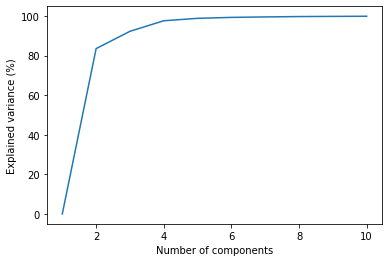

In [28]:
print("Cumulative Variances (Percentage):")

components = len(pca.explained_variance_ratio_)
# Make the scree plot
y_h=np.cumsum(pca.explained_variance_ratio_ * 100)
y_h = np.insert(y_h,0, 0)
plt.plot(range(1, components + 2), y_h)
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

### Comments: 
> 6 (max 7) components explained the essential of information stored by the data/features

In [55]:
n_components=7
pca=PCA(n_components=n_components)
X_reduced=pd.DataFrame(pca.fit_transform(X),columns=['PCA'+str(i) for i in range(1,n_components+1)])

# Split the data into training and testing set
X_train_reduced,X_valid_reduced, y_train2, y_valid2 =train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [56]:
import plotly.express as px
fig=px.bar(
    x=['PCA'+str(i) for i in range(1,n_components+1)],
          y=pca.explained_variance_ratio_,
          labels={'x':'Principal Component','y':'Variance Ratio'},
          color=pca.explained_variance_ratio_,
          color_continuous_scale=[(0,'lightblue'),(1,'darkblue')],
          title='Proportion of Variance in Principal Components')
fig.show()

In [57]:
# training
models2={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Extra Tree' : ExtraTreesClassifier(),
    'Support Vector Machine(Linear Kernel)': LinearSVC(),
    'Support Vector Machine(Non Linear Kernel)':SVC(),
    'Neural Network':MLPClassifier(),
     'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier()
}

In [58]:
reduced_results=[]
for name,model in models2.items():
    model.fit(X_train_reduced,y_train2)
    score=model.score(X_valid_reduced,y_valid2)
    reduced_results.append(score)
    print(name+":"+str(score))

Logistic Regression:0.931637519872814
K-Nearest Neighbors:0.9507154213036566
Decision Tree:0.9324324324324325
Extra Tree:0.9602543720190779
Support Vector Machine(Linear Kernel):0.7726550079491256
Support Vector Machine(Non Linear Kernel):0.9308426073131956
Neural Network:0.9292527821939587
Random Forest:0.9483306836248012
Gradient Boosting:0.9372019077901431


* Comments: With Extra Tree, we reach an accuracy of 0.96

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        87
           1       0.96      1.00      0.98      1171

    accuracy                           0.96      1258
   macro avg       0.98      0.71      0.79      1258
weighted avg       0.96      0.96      0.95      1258

[[  37   50]
 [   0 1171]]
Accuracy of the model on validation Sample Data: 0.95

Accuracy values for 10-fold Cross Validation:
 [0.93385802 0.93509281 0.91458948 0.91180346 0.90719233 0.914779
 0.91742211 0.90765525 0.92557972 0.89926027]

Final Average Accuracy of the model: 0.92


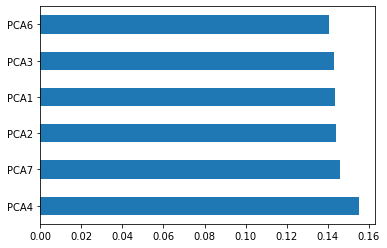

In [66]:
# Measuring accuracy on Testing Data

xrf_clf2=models2['Extra Tree']
y_predict = xrf_clf2.predict(X_valid_reduced)
print(metrics.classification_report(y_valid2, y_predict))
print(metrics.confusion_matrix(y_valid2, y_predict))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_valid2, y_predict, average='weighted')
print('Accuracy of the model on validation Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 6 most important columns
%matplotlib inline
feature_importances = pd.Series(xrf_clf2.feature_importances_, index=X_reduced.columns)
feature_importances.nlargest(6).plot(kind='barh')


# Running 10-Fold Cross validation on a given algorithm (ExtraTreesClassifier)
# Passing full data X and y because the K-fold will split the data and automatically choose train/test

Accuracy_Values=cross_val_score(xrf_clf2, X_reduced , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Final Comments:
The cross-validation is used to detect overfitting, ie, failing to generalize a pattern (regularization purpose).

The average Accuracy value for 10-fold Cross Validation increase in this approach when using PCA (just select the essential information/features which explained the entire data). It is an alternative to the approach we used to select important features... Moreover, using only few components, speed us the execution of some algorithms.

#### Next:
- >  Grid Search for Hyperparameters Tuning in this approach (similar to the one perform earlier)

- > Model deployement (saving using the library Pickle for example) and serve the applications which need this prediction:

## Final Model and Deployment: 

We can choose the following pipeline based on our previous work:

- Load the data and  one-hot encoding of the categorical target variable

- Preprocessing : remove unnecessary columns,Replace missing values with the mean or the median, perform PCA with 7 components (by default standardize the data), if necessary splitting the data set in train/valid set

- Fitting : using ExtraTreeClassifier with 10-fold cross validation (If data not splitted earlier) just for regularization purpose.

- Prediction : Use the fitted model to predict over future unseen data.

Possible in Object-oriented programming:

In [ ]:
#Load the data
pathname=""
data=pd.read_csv(pathname)

# Convert categorical variables to numerical variables
data['status_label'] = data['status_label'].apply(lambda x: 1 if x == 'alive' else 0)
# Separate the features and target variable
X = data.drop(['status_label'], axis=1)
y = data['status_label']

n_components=7

def preprocess(X):
  # Drop irrelevant columns
  X.drop(['company_name', 'year'], axis=1, inplace=True)
  # fill na values
  X.fillna(data.median(), inplace=True)
  return X

def fit(X,y):
  # define the pca
  pca=PCA(n_components=n_components)
  # fit the pca over the data
  X_reduced=pd.DataFrame(pca.fit_transform(X),columns=['PCA'+str(i) for i in range(1,n_components+1)])
  # define the model with parameters from hyperparameters tunning
  PredictionModel = ExtraTreesClassifier(n_estimators=50, min_samples_split=2,min_samples_leaf=1)
  # Running 10-Fold Cross validation on the ExtraTreesClassifier
  Accuracy_Values=cross_val_score(PredictionModel, X_reduced , y, cv=10, scoring='f1_weighted')
  print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
  print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
  return  pca, PredictionModel

# function prediction for new unseen samples
def FunctionPredictResult(InputData,PredictionModel,pca=None): #,predictors,PredictorScalerFit=None):
    # Preprocessing
    DataForML = preprocess(InputData)  
    # Generating the standardized values of X since it was done while model training also
    #X=PredictorScalerFit.transform(DataForML)
    X = pca.transform(DataForML)
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    # transform to DataFrame
    PredictionResult=pd.DataFrame(Prediction, columns="status_label")

    return PredictionResult

def save(PredictionModel,pathname):
  return
def load(pathname):
  return